# Hypothesis 5: Trust by Age Group

**Hypothesis:** Younger participants will perceive LLM-generated content as more trustworthy than older participants.

This notebook's goal is to analyize the data in regards to the fifth hypothesis by calculating the mean score for trustworthiness of participants' per age group within the AI_group using ANOVA.

### Load preprocessed data

To start, we'll import all relevant libraries needed to test this hypothesis and load the data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway

from data_preprocessing import load_and_preprocess

# Load and preprocess data
df = load_and_preprocess('data/cleaned_file.csv')

C:\Users\saski\AppData\Local\Temp\ipykernel_16624\2729394660.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Calculate Trust Score

In [3]:
# Calculate mean trust score
trust_cols = [
    'trustworthiness01', 'trustworthiness02', 'trustworthiness03',
    'trustworthiness04', 'trustworthiness05', 'trustworthiness06']

df['trustworthiness'] = df[trust_cols].mean(axis=1)

### Filter to AI-Group and compare Age groups

In [5]:
# Filter to AI content only
df_ai = df[df['content_type'] == 'AI'].copy()

In [6]:
# Compare age groups
groups = df_ai['age'].unique()
trust_by_age = [df_ai[df_ai['age'] == g]['trustworthiness'] for g in groups]

# ANOVA test
anova_result = f_oneway(*trust_by_age)
print("ANOVA: Trustworthiness by Age Group (AI only):", anova_result)

ANOVA: Trustworthiness by Age Group (AI only): F_onewayResult(statistic=0.4870055221827881, pvalue=0.6204050257109339)


## Visualize the results:

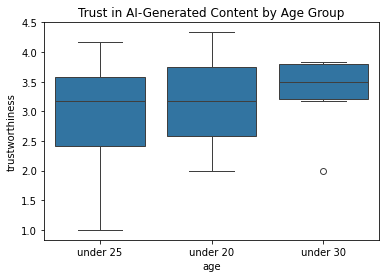

In [7]:
# Boxplot of trustworthiness by age group (AI only)
sns.boxplot(x='age', y='trustworthiness', data=df_ai)
plt.title('Trust in AI-Generated Content by Age Group')
plt.show()

### Conclusion

Trustworthiness ratings did not differ significantly between age groups (p > 0.05). Age was not a significant predictor of trust in LLM-generated content.